In [1]:
# Get everything setup for dedicated module loading

%load_ext autoreload
%autoreload 2
from renault.plot import *


In [2]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv('data/train_df_LHA.csv',index_col='Unnamed: 0' )
filling = ['ActVolume', 'ActMass']
STEPS = ['StepLoading', 'StepEndLoading']

In [10]:
df.groupby('pji').count()['fluid'].describe()

count      59.000000
mean      813.169492
std       314.715260
min        12.000000
25%       546.000000
50%       996.000000
75%      1008.500000
max      1068.000000
Name: fluid, dtype: float64

Number of steps for each type of measurements

In [24]:
df[df.measurement.isin(filling)].groupby(['fluid','pji', 'step', 'measurement'], as_index=False) \
    .agg({'dataValue': 'describe'}) \
    .groupby(['fluid',  'measurement','step']) \
    .count()

/Users/alix/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:4147: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


pji dataValue                             
                                           count mean std min 25% 50% 75% max
fluid   measurement step                                                     
FRFluid ActVolume   StepEndLoading  42        42   42  25  42  42  42  42  42
                    StepLoading     58        58   58  58  58  58  58  58  58
RMFluid ActVolume   StepEndLoading   5         5    5   1   5   5   5   5   5
                    StepLoading     58        58   58  58  58  58  58  58  58

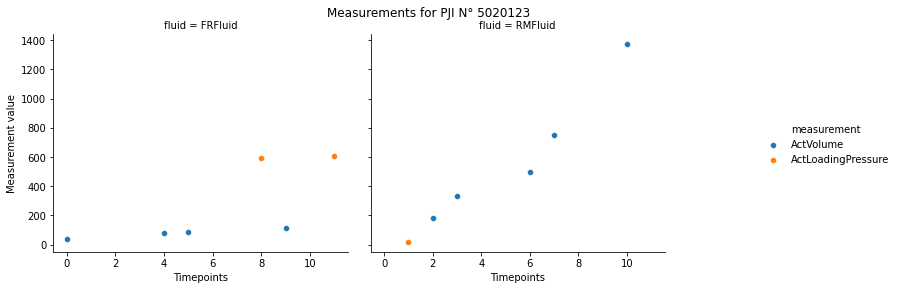

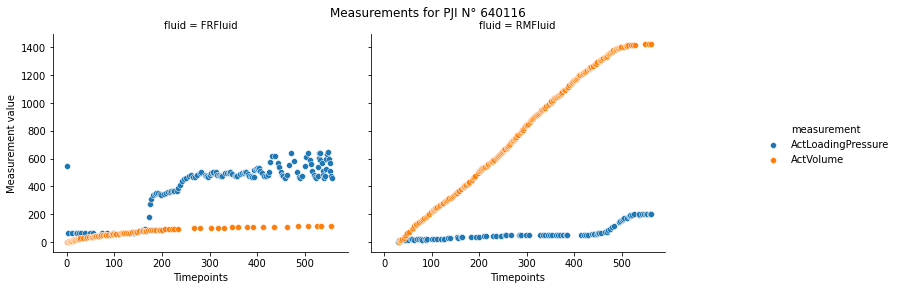

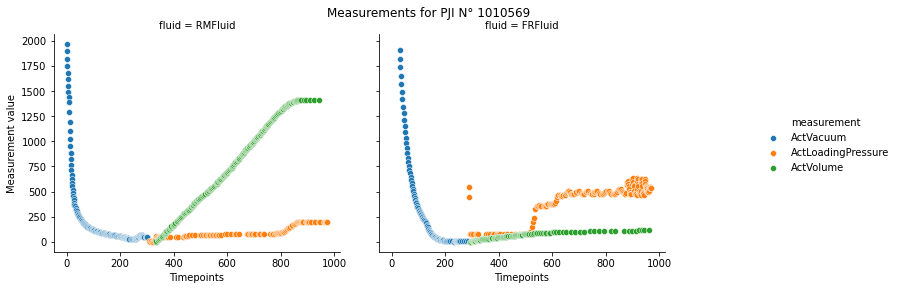

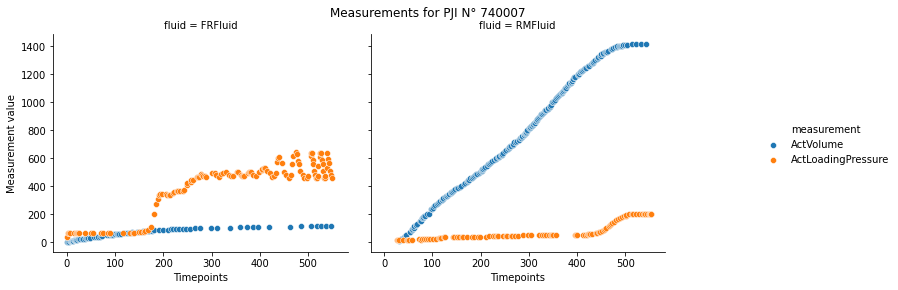

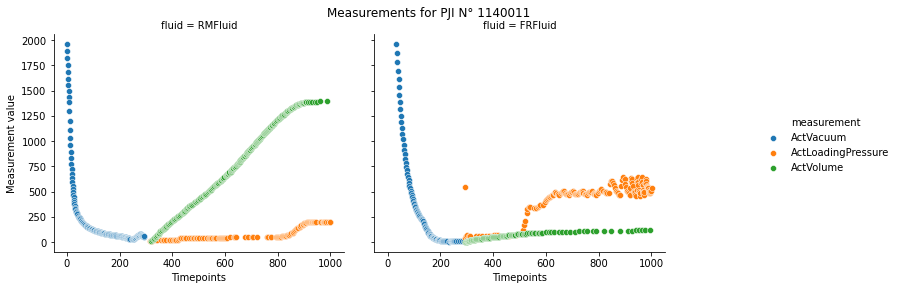

In [26]:
df.sourceTimestamp = pd.to_datetime(df.sourceTimestamp)
df.sort_values('sourceTimestamp', inplace=True)
for num in np.random.choice(df.pji.unique(), 5):
    plot_all_fluid(df,num)

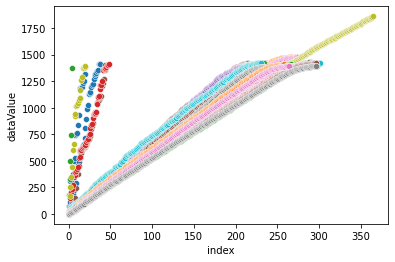

In [28]:
for num in df.pji.unique():
    plot_selective_fluid(df,num, 'RMFluid', 'ActVolume')

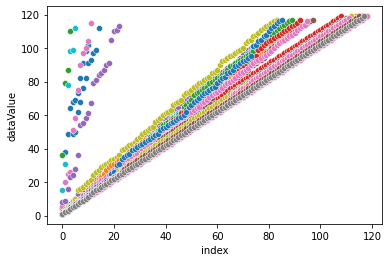

In [29]:
for num in df.pji.unique():
    plot_selective_fluid(df,num, 'FRFluid', 'ActVolume')

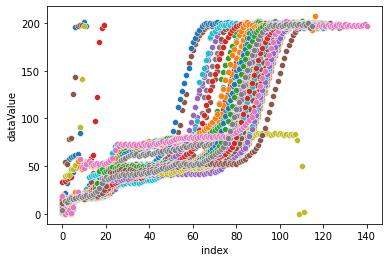

In [30]:
for num in df.pji.unique():
    plot_selective_fluid(df,num, 'RMFluid', 'ActLoadingPressure')

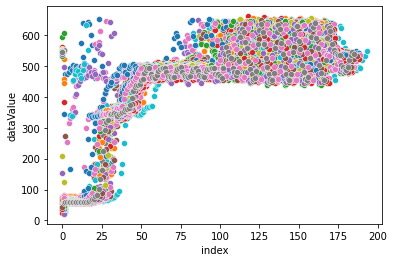

In [31]:
for num in df.pji.unique():
    plot_selective_fluid(df,num, 'FRFluid', 'ActLoadingPressure')

In [37]:
df[(df.dataValue > 1500) & (df.measurement == 'ActVolume') ]['pji'].unique()

array([4620256])

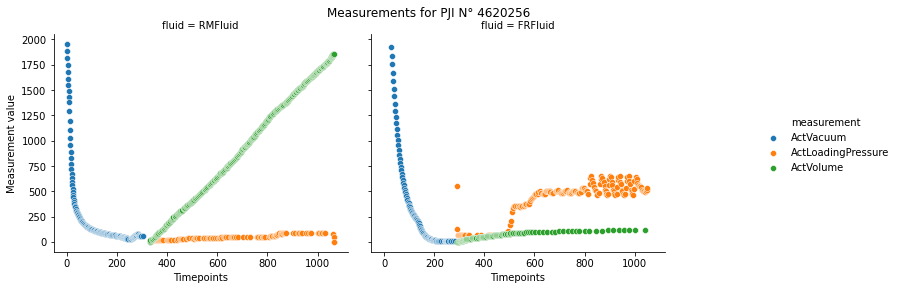

In [38]:
plot_all_fluid(df, 4620256)

In [39]:
df


,siteCode,objectUAI,machine,fluid,measurement,step,sourceTimestamp,pji,dataValue,body_type,driving_side,gearbox_type,hybrid_level,engine_type
313153,FRLHA,A000003FY5,FillingStation_1,FRFluid,ActVolume,StepLoading,2021-01-25 11:02:28.031000+00:00,810451,4.0,F82,DG,BVM6,NOT_HYBRID,M9R
312268,FRLHA,A000003FY5,FillingStation_1,RMFluid,ActLoadingPressure,StepLoading,2021-01-25 11:02:28.328000+00:00,810451,7.0,F82,DG,BVM6,NOT_HYBRID,M9R
313512,FRLHA,A000003FY5,FillingStation_1,RMFluid,ActLoadingPressure,StepLoading,2021-01-25 11:02:28.625000+00:00,810451,2.0,F82,DG,BVM6,NOT_HYBRID,M9R
310695,FRLHA,A000003FY5,FillingStation_1,FRFluid,ActLoadingPressure,StepLoading,2021-01-25 11:02:29.625000+00:00,810451,68.0,F82,DG,BVM6,NOT_HYBRID,M9R
306735,FRLHA,A000003FY5,FillingStation_1,RMFluid,ActLoadingPressure,StepLoading,2021-01-25 11:02:30.234000+00:00,810451,55.0,F82,DG,BVM6,NOT_HYBRID,M9R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243647,FRLHA,A000003FY5,FillingStation_1,FRFluid,ActLoadingPressure,StepEndLoading,2021-01-27 20:01:48.734000+00:00,740170,518.0,F82,DG,BVM6,NOT_HYBRID,M9R
161149,FRLHA,A000003FY5,FillingStation_1,FRFluid,ActVolume,StepEndLoading,2021-01-27 20:01:48.734000+00:00,740170,119.0,F82,DG,BVM6,NOT_HYBRID,M9R
244826,FRLHA,A000003FY5,FillingStation_1,FRFluid,ActLoadingPressure,StepEndLoading,2021-01-27 20:01:48.859000+00:00,740170,537.0,F82,DG,BVM6,NOT_HYBRID,M9R
242098,FRLHA,A000003FY5,FillingStation_1,FRFluid,ActLoadingPressure,StepEndLoading,2021-01-27 20:01:49.140000+00:00,740170,544.0,F82,DG,BVM6,NOT_HYBRID,M9R
